## EXERCISE 1: Design, Train and Test a CNN

Create a CNN using Keras library with the followings specifications:

> __QUESTION 1(a):__  DATASET: Load the CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.
You can use the function datasets.cifar10.load_data() to load the dataset after importing the keras dataset with the command: from tensorflow.keras import datasets. Split the dataset in train and test set

> __QUESTION 1(b):__  Plot some samples in the dataset to visualize the kind of data

> __QUESTION 1(c):__  Build and compile a CNN model composed with: 
* Conv2D with 32 filters, kernel size 3X3, activation function relu
* MaxPooling 2D with kernel size 2x2
* Conv2D with 64 filters kernel size 3X3, activation function relu
* MaxPooling 2D with kernel size 2x2
* Conv2D with 64 filters kernel size 3X3, activation function relu
* Flatten layer
* Dense layer with 64 neurons and activation function relu
* Final Dense layer for returning 10 classes
* adam as optmizer


> __QUESTION 1(d):__ Train and test on the CIFAR10 dataset with 10 epochs to check the performance

> __QUESTION 1(e):__ Compute the confusion matrix

> __QUESTION 1(f):__ : Test your model on new images about the available class that you can download from the web. 

### QUESTION 1(a)

In [1]:
from tensorflow import keras
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

### QUESTION 1(b)

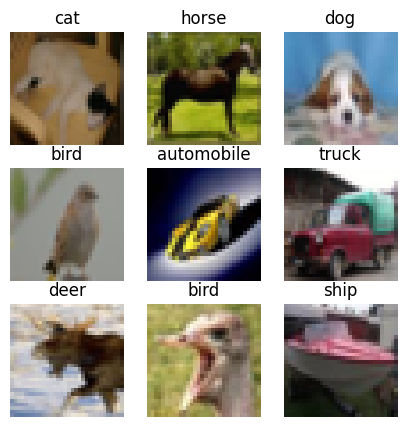

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship", "truck"]

plt.figure(figsize=(5, 5))
for i in range(9):
    rnd = random.randrange(50000)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[rnd])
    plt.title(classes[y_train[rnd][0]])
    plt.axis("off")

### QUESTION 1(c)

In [3]:
import tensorflow as tf

# The following lines allows to exploit the GPU and make the training faster (Check in the Runtime - Change Runtime time if the GPU is set)
gpus = tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

In [4]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#model.summary()
#keras.utils.plot_model(model, show_shapes=True)

In [5]:
epochs = 10

model.compile( # this is very important, define the optimizer, the loss and the metrics to track
    optimizer=keras.optimizers.Adam(1e-3), # for regularization
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

logdir='logs' # 1.02
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir) # it allows to create the checkpoint to check the log, to save a tmp model, to see how your model is performing

# fit the data 
hist = model.fit(
    x_train, y_train, # training data
    epochs=epochs, # how long to train 
    validation_data=(x_test,y_test), # we pass then the validation, we can see how the model performs in real time
    callbacks=[tensorboard_callback] # pass the callback for the checkpoint

)


# we save the output in hist in order to retrieve the information about the training of the model

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: -40.8735 - accuracy: 0.1117 - val_loss: -41.0938 - val_accuracy: 0.1100
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: -41.0938 - accuracy: 0.1131 - val_loss: -41.0938 - val_accuracy: 0.1100
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: -41.0938 - accuracy: 0.1131 - val_loss: -41.0938 - val_accuracy: 0.1100
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: -41.0938 - accuracy: 0.1131 - val_loss: -41.0938 - val_accuracy: 0.1100
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: -41.0938 - accuracy: 0.1131 - val_loss: -41.0938 - val_accuracy: 0.1100
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: -41.0938 - accuracy: 0.1131 - val_loss: -41.0938 - val_accuracy: 0.1100
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: -41.0938 - accuracy: 0

### QUESTION 1(e)

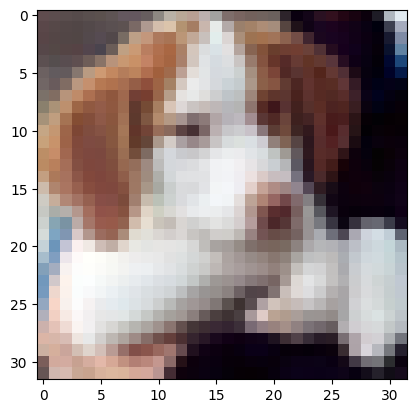

1/1 [==============================] - 0s 49ms/step
[[ 2411.4968     70.62508   717.1632   1919.4307  -1176.0756   1246.3317
   2411.981     402.34735  2216.9927    664.17676]]
frog


In [22]:
img = x_test[16]
plt.imshow(img.astype(int))
plt.show()
img = tf.image.resize(img, (32,32))
img = np.expand_dims(img, 0)
yhat = model.predict(img)
print(yhat)
c = classes[np.argmax(yhat)]
print(c)

In [25]:
from sklearn import metrics

pred = []
for img in x_test:
    tmp = tf.image.resize(img, (32,32))
    tmp = np.expand_dims(tmp, 0)
    yhat = model.predict(tmp)
    #c = classes[np.argmax(yhat)]
    c = np.argmax(yhat)
    pred.append(c)
    
pred = np.array(pred)
disp_linear = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)
disp_linear.figure_.suptitle("Confusion Matrix")

1/1 [==============================] - 0s 17ms/step


ValueError: Mix of label input types (string and number)

Text(0.5, 0.98, 'Confusion Matrix')

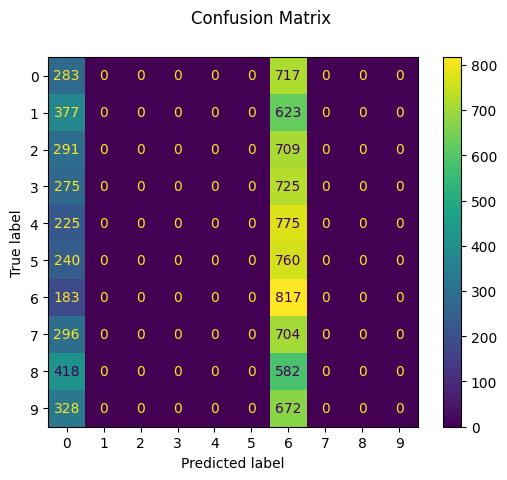

In [28]:
a = []
for el in pred:
    a.append(classes.index(el))

disp_linear = metrics.ConfusionMatrixDisplay.from_predictions(y_test, a)
disp_linear.figure_.suptitle("Confusion Matrix")